In [2]:
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import numpy as np

In [62]:
def beta_cooperation_exp(beta_max, coop_frac, type_response="exponential"):

    if type_response=="exponential":
        beta = beta_max*np.exp(-coop_frac)
    elif type_response=="linear":
        # beta = beta_max*(1-coop_frac)  + np.exp(-1)*beta_max*coop_frac
        beta_min = beta_max*np.exp(-1)
        beta = (beta_min - beta_max)*coop_frac + beta_max
    elif type_response=="linear-perp":
        # betal = beta_max*(1-coop_frac)  + np.exp(-1)*beta_max*coop_frac
        beta_min = beta_max*np.exp(-1)
        beta_y = (beta_min - beta_max)*coop_frac + beta_max
        m = -1/(beta_min - beta_max)
        beta = m*coop_frac
    elif type_response=="concave":
        # beta2 =  beta_max*np.exp(-coop_frac) - beta_max*(1-coop_frac)  - np.exp(-1)*beta_max*coop_frac
        p = 1/(4*(beta_max*np.exp(-1) - beta_max))
        beta2 = (coop_frac**2)/(4*p) + beta_max
        beta  = beta2
    elif type_response=='convex':
        p = 1/(4*(beta_max - beta_max*np.exp(-1)))
        beta2 = ((coop_frac-1)**2)/(4*p) + beta_max*np.exp(-1)
        beta  = beta2
    elif type_response=='s-shape':
        beta_min = beta_max*np.exp(-1)
        # r = -np.log( (beta_max/c - 1) / (beta_max/c - 1) )
        # beta3 = ((1-c)/(1+np.exp(10*(coop_frac/10000 - 1)))) + c
        r = 10
        c = beta_max / (1 + (beta_max/beta_min - 1)/np.exp(-r))
        beta3 = beta_max/(1 + ((beta_max - beta_min)/beta_min) * np.exp(-(1-coop_frac)*r))
        beta = beta3
    elif type_response=='s-shape-inv':
        beta_min = beta_max*np.exp(-1)
        beta_y = (beta_min - beta_max)*coop_frac + beta_max
        r = 10
        c = beta_max / (1 + (beta_max/beta_min - 1)/np.exp(-r))
        # beta3 = (np.log(beta_max/-coop_frac - 1) - np.log((beta_max - beta_min)/beta_min))/r +1

        # r = 10
        # c = beta_max / (1 + (beta_max/beta_min - 1)/np.exp(-r))
        beta3 = beta_max/(1 + ((beta_max - beta_min)/beta_min) * np.exp((1-coop_frac)*r))
        
        beta = beta3

    return beta

coop_frac_vec = np.linspace(0, 1, 100)

beta_max = 0.3
betas_exp         = [beta_cooperation_exp(beta_max, c, type_response="exponential") for c in coop_frac_vec]
betas_linear      = [beta_cooperation_exp(beta_max, c, type_response="linear")      for c in coop_frac_vec]
betas_linear_perp = [beta_cooperation_exp(beta_max, c, type_response="linear-perp") for c in coop_frac_vec]
betas_conc        = [beta_cooperation_exp(beta_max, c, type_response="concave")     for c in coop_frac_vec]
betas_conv        = [beta_cooperation_exp(beta_max, c, type_response="convex")      for c in coop_frac_vec]
betas_s           = [beta_cooperation_exp(beta_max, c, type_response="s-shape")     for c in coop_frac_vec]
betas_s_inv       = [beta_cooperation_exp(beta_max, c, type_response="s-shape-inv") for c in coop_frac_vec]


In [63]:
len(betas_conv), len(betas_exp), len(betas_linear), len(betas_conc), len(betas_s)

(100, 100, 100, 100, 100)

In [65]:
import pandas as pd
coop_frac_vec = list(coop_frac_vec)
df_result = pd.DataFrame( columns=["c", "beta", "type"])
df_result["c"]    = coop_frac_vec + coop_frac_vec + coop_frac_vec + coop_frac_vec + coop_frac_vec
df_result["beta"] = list(betas_conv)    + list(betas_exp)     + list(betas_linear)  + list(betas_conc)    + list(betas_s)
df_result["type"] = ["Convex"]*100 + ["Exponential"]*100 + ["Linear"]*100 + ["Concave 1"]*100 + ["Concave 2"]*100

df_result = df_result.iloc[:-1]


,c,beta,type
0,0.000000,0.300000,Convex
1,0.010101,0.296188,Convex
2,0.020202,0.292415,Convex
3,0.030303,0.288681,Convex
4,0.040404,0.284985,Convex
...,...,...,...
494,0.949495,0.147280,Concave 2
495,0.959596,0.139720,Concave 2
496,0.969697,0.132212,Concave 2
497,0.979798,0.124794,Concave 2


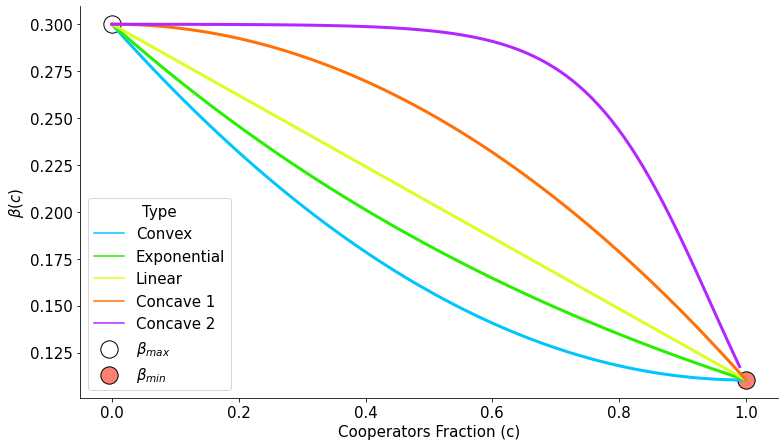

In [81]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))
sns.lineplot(ax=ax, data=df_result, x="c", y="beta", hue="type", palette="gist_ncar", lw=3)

ax.scatter(0, beta_max, edgecolor='k', facecolor='w', s = 300, label=r"$\beta_{max}$")
ax.scatter(1, beta_max * np.exp(-1), edgecolor='k', facecolor='salmon', s = 300, label=r"$\beta_{min}$")
ax.tick_params( which='both', axis='both', labelsize=15)

ax.set_ylabel(r"$\beta(c)$", fontsize=15)
ax.set_xlabel("Cooperators Fraction (c)", fontsize=15)
ax.legend(fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=15, title_fontsize=15, title="Type")

fig.savefig("functional_response_beta.png",  dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)